12.333333333333334
test 8.666666666666668


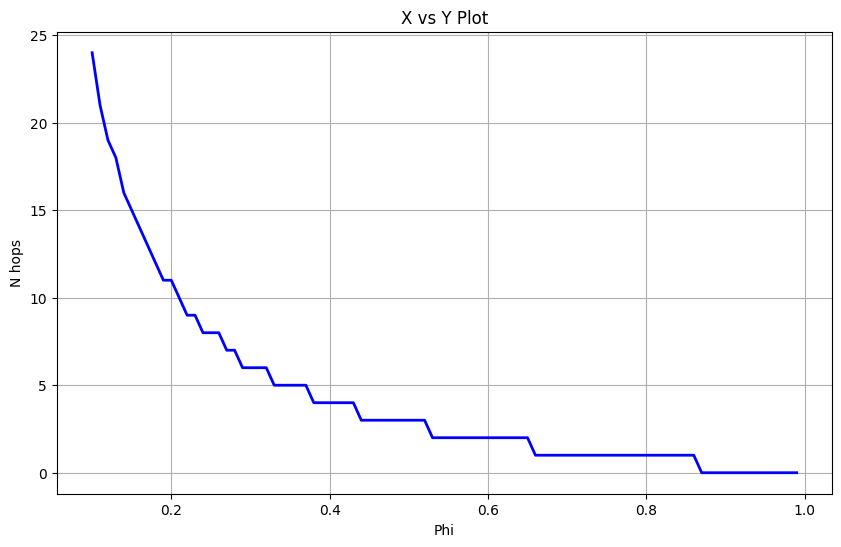

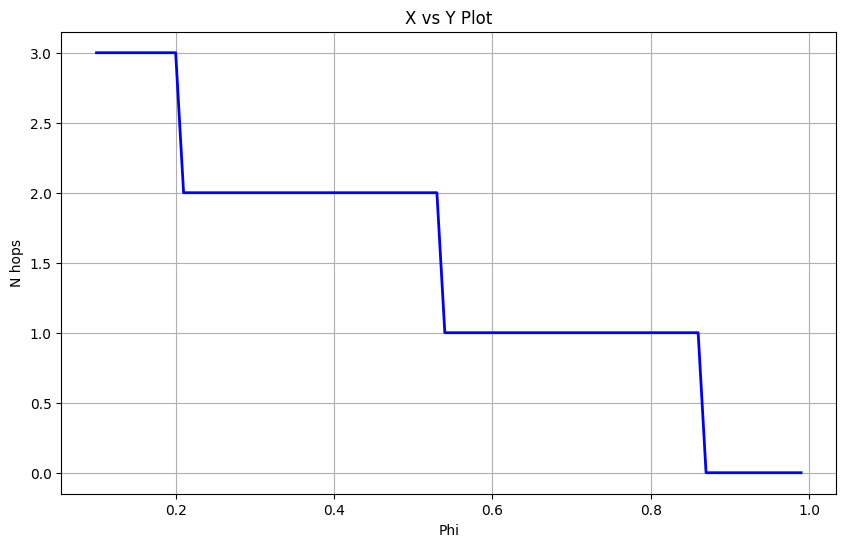

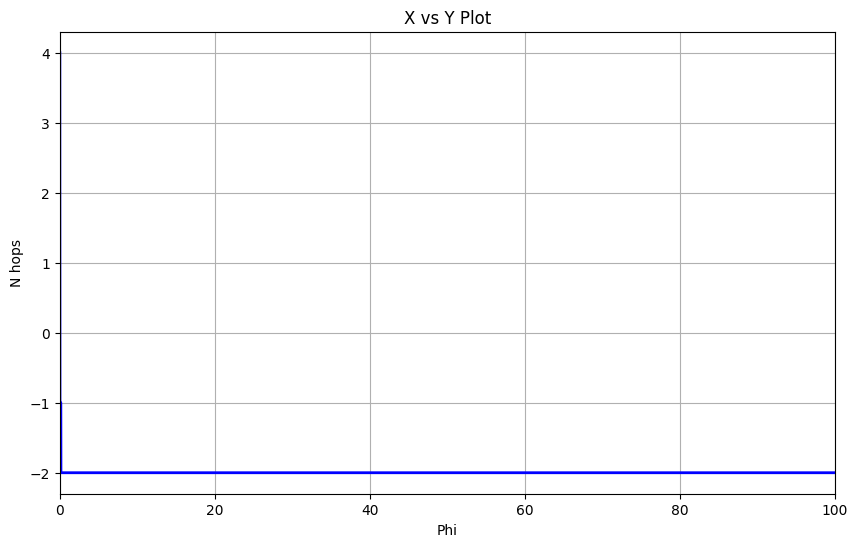

In [46]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import yticks

# Your existing code
D = 100

config = {
    "base": {
        "obdh": {
            "speed": 30.0,
            "phi": 0.9,
            "energy_uptime": 1,
            "energy_io": 0.001
        },
        "ground_link": {
            "speed": 10.0,
            "energy": 5,
            "distance": 700
        }
    },
    "offloading": {
        "user_satellite": {
            "obdh": {
                "phi": None,
                "speed": None,
                "energy_uptime": None,
                "energy_io": None
            },
            "isl": {
                "speed": None,
                "energy": 3,
                "distance": 100
            }
        },
        "edge_node": {
            "edge_computer": {
                "phi": None,
                "speed": 300.0,
                "energy_uptime": 50,
                "energy_io": 0.001
            },
            "ground_link": {
                "speed": None,
                "energy": 5,
                "distance": 700
            }
        }
    }
}

sgl = config["base"]["ground_link"]["speed"]
sisl = sgl * 3
sec = config["offloading"]["edge_node"]["edge_computer"]["speed"]
phi_obdh = config["base"]["obdh"]["phi"]
sobdh = config["base"]["obdh"]["speed"]

base = D * (1/sobdh) + D * (phi_obdh/sgl)
print(base)

x = np.arange(0.1, 1, 0.01)
y_first = []
y_last = []

for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * (sisl/phi) + 1
    y_first.append(math.floor(value))

for phi in x:
    value = ( (-1/sisl) - (1/sec) - ((phi-phi_obdh)/sgl) + (1/sobdh) ) * sisl + 1
    y_last.append(math.floor(value))

y_even=[]
x_even=np.arange(0, D, 0.1)
new_x = [(D/(v*100)) for v in x_even if v != 0]

beta=D-(D*phi_obdh)

for alpha in x_even:
    if alpha == 0:
        continue

    value = 1 + ((2 * sisl * sec) / ((alpha - 2*D) * (sisl + sec))) * ((D/sisl) + (D/sec) + ((alpha - beta)/sgl) - (D/sobdh))
    y_even.append(math.floor(-value))

N = 1
alpha = D/2
result = (D/sisl) + (D/sec) - ((N - 1) * (alpha - 2*D) * (sisl + sec)) / (2 * sisl * sec) + (D - alpha) / sgl
print("test", result)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_first, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_last, 'b-', linewidth=2)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(new_x, y_even, 'b-', linewidth=2)
plt.xlim(0, 100)
plt.xlabel('Phi')
plt.ylabel('N hops')
plt.title('X vs Y Plot')
plt.grid(True)
plt.show()